<a href="https://colab.research.google.com/github/ankitparashar785/Final_project/blob/main/Major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [4]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
train=pd.read_csv('/content/drive/MyDrive/Foiler_Disese/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Foiler_Disese/test.csv')

In [ ]:
DIR=r'/content/drive/MyDrive/Foiler_Disese/images'

In [31]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


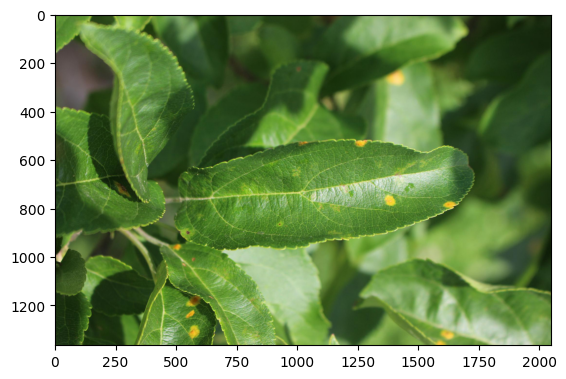

In [ ]:
image1=Image.open('/content/drive/MyDrive/Foiler_Disese/images/Test_0.jpg')
plt.imshow(image1)
plt.show()

# **Prepare the Training Data**


In [7]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [8]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [9]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [ ]:
DIR

'/content/drive/MyDrive/Foiler_Disese/images'

In [ ]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [ ]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [ ]:
DIR

'/content/drive/MyDrive/Foiler_Disese/images'

In [9]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        imgg=img.split('.')[0]
        label0=train.loc[train['image_id']==imgg,'healthy'].tolist()
        label1=train.loc[train['image_id']==imgg,'multiple_diseases'].tolist()
        label2=train.loc[train['image_id']==imgg,'rust'].tolist()
        label3=train.loc[train['image_id']==imgg,'scab'].tolist()
        path=os.path.join(DIR,img)
        if search("Train",img):
          if label0[0]==True:
            shutil.copy(path,r'/content/drive/MyDrive/Foiler_Disese/images/train/healthy')
          elif label1[0]==True:
            shutil.copy(path,r'/content/drive/MyDrive/Foiler_Disese/images/train/multiple_disease')
          elif label2[0]==True:
            shutil.copy(path,r'/content/drive/MyDrive/Foiler_Disese/images/train/rust')
          elif label3[0]==True:
            shutil.copy(path,r'/content/drive/MyDrive/Foiler_Disese/images/train/scab')
        
        elif search("Test",img):
             shutil.copy(path,r'/content/drive/MyDrive/Foiler_Disese/images/test')  


In [ ]:
img="Train_10.jpg"
path="/content/drive/MyDrive/Foiler_Disese/images/Train_10.jpg"
img=img.split('.')[0]
label0=train.loc[train['image_id']==img,'multiple_diseases'].tolist()
print(label0[0])
if label0[0]==True:
  shutil.copy(path,r'/content/drive/MyDrive/Foiler_Disese/images/train/multiple_disease')

0


In [ ]:
img.split("_")[1].split(".")[0]

'4'

In [ ]:
shutil.os.makedirs(r'/content/drive/MyDrive/Foiler_Disese/images/train',exist_ok=True)
shutil.os.makedirs(r'/content/drive/MyDrive/Foiler_Disese/images/train/healthy',exist_ok=True)
shutil.os.makedirs(r'/content/drive/MyDrive/Foiler_Disese/images/train/multiple_disease',exist_ok=True)
shutil.os.makedirs(r'/content/drive/MyDrive/Foiler_Disese/images/train/rust',exist_ok=True)
shutil.os.makedirs(r'/content/drive/MyDrive/Foiler_Disese/images/train/scab',exist_ok=True)

shutil.os.makedirs(r'/content/drive/MyDrive/Foiler_Disese/images/test',exist_ok=True)

In [ ]:
train_dir=create_train_data()

100%|██████████| 3644/3644 [06:41<00:00,  9.07it/s]


# **Data Preprocessing**

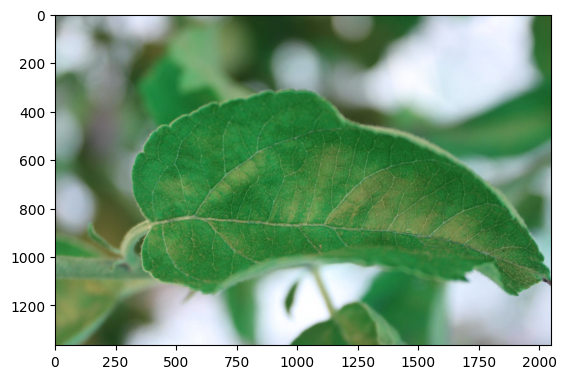

In [13]:
Train_DIR=r'/content/drive/MyDrive/Foiler_Disese/images/train'
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break
    

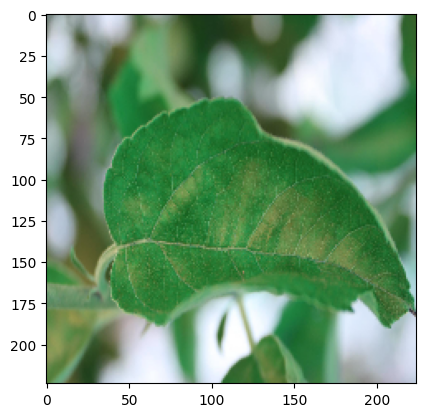

In [14]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

# **Model Prepration**

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [16]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'/content/drive/MyDrive/Foiler_Disese/images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'/content/drive/MyDrive/Foiler_Disese/images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [19]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [17]:
checkpoint=ModelCheckpoint(r'/content/drive/MyDrive/Foiler_Disese/apple2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [20]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

<ipython-input-20-f3d4518fa28e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2657 - accuracy: 0.3287
Epoch 1: val_loss improved from inf to 1.26361, saving model to /content/drive/MyDrive/Foiler_Disese/apple2.h5
91/91 [==============================] - 412s 4s/step - loss: 1.2657 - accuracy: 0.3287 - val_loss: 1.2636 - val_accuracy: 0.3210
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.2170 - accuracy: 0.3904
Epoch 2: val_loss improved from 1.26361 to 1.18963, saving model to /content/drive/MyDrive/Foiler_Disese/apple2.h5
91/91 [==============================] - 223s 2s/step - loss: 1.2170 - accuracy: 0.3904 - val_loss: 1.1896 - val_accuracy: 0.3722
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.0007 - accuracy: 0.5479
Epoch 3: val_loss improved from 1.18963 to 0.77510, saving model to /content/drive/MyDrive/Foiler_Disese/apple2.h5
91/91 [==============================] - 245s 3s/step - loss: 1.0007 - accuracy: 0.5479 - val_loss: 0.7751 - val_accu

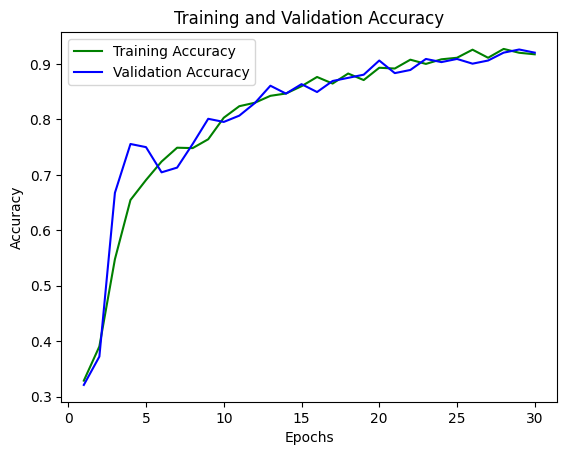

In [21]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

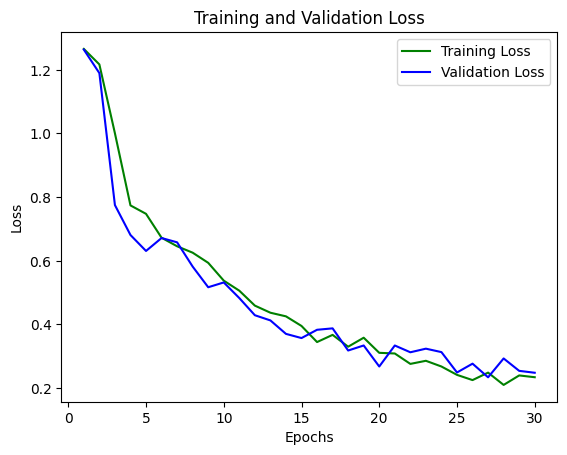

In [22]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## **Prediction**

1/1 [==============================] - 0s 43ms/step
1


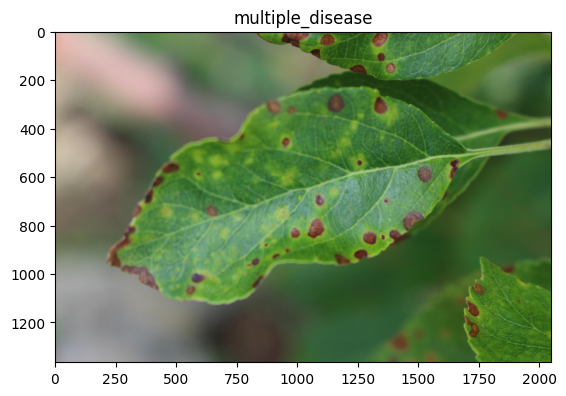

In [36]:
test_image=r'/content/drive/MyDrive/Foiler_Disese/images/train/multiple_disease/Train_113.jpg'
image_result=Image.open(test_image)
from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()